# Background & Context

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

Project delivery:

You have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment.

The outcome of your delivery will be a presentation to XYZ’s Executive team. This presentation will be judged based on the visuals provided, the quality of your analysis and the value of your recommendations and insights. 

# Data Description

Data contains information on Pink and Yellow cab companies.

Cab_Data.csv – file contains details of transaction for the two cab companies

Customer_ID.csv – file contains customer’s demographic details

Transaction_ID.csv – file contains customer's transaction and payment mode

City.csv – file contains list of US cities, their population and number of cab users

Holiday.csv – file contains dates of US holidays

# Loading libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import matplotlib as mpl
import pyautogui
from datetime import datetime


# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I  print it
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

# To build linear model for statistical analysis and prediction
import math
import statsmodels.stats.api as sms
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings


C:\Users\Hp\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Hp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
C:\Users\Hp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Loading and cleaning the data

### Cab Data

In [2]:
# Loading cab data
cab_Data = pd.read_csv(r"C:\Users\hp\Downloads\cab_Data.csv")
print(
    f"There are {cab_Data.shape[0]} rows and {cab_Data.shape[1]} columns."
) # f-string
np.random.seed(1)  # To get the same random results every time
cab_Data.sample(n=5)

There are 359392 rows and 7 columns.


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
191643,10235412,43013,Yellow Cab,NEW YORK NY,30.72,823.15,427.6224
179985,10221579,42988,Yellow Cab,WASHINGTON DC,28.00,419.58,386.4000
156955,10193524,42924,Yellow Cab,WASHINGTON DC,39.78,497.06,548.9640
220917,10270356,43078,Pink Cab,LOS ANGELES CA,7.49,101.58,79.3940
282185,10346693,43286,Yellow Cab,MIAMI FL,3.39,58.56,45.1548


In [3]:
# Implementing data cleaning by eliminating spaces
for col in cab_Data.columns:
    if " " in col:
        cab_Data = cab_Data.rename(
            columns={col: col.replace(" ", "_")}
        )

In [4]:
# Check for Cab_Data missing values
missing_values = cab_Data.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for duplicates
duplicate_rows = cab_Data.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicate_rows)

Missing Values:
 Transaction_ID    0
Date_of_Travel    0
Company           0
City              0
KM_Travelled      0
Price_Charged     0
Cost_of_Trip      0
dtype: int64

Number of Duplicate Rows: 0


In [5]:
# We use dataframe.dtypes to get the data types of each column
cab_Data.dtypes

Transaction_ID      int64
Date_of_Travel      int64
Company            object
City               object
KM_Travelled      float64
Price_Charged     float64
Cost_of_Trip      float64
dtype: object

### Customer ID

In [6]:
# Loading cab data
Customer_ID = pd.read_csv(r"C:\Users\hp\Downloads\Customer_ID.csv")
print(
    f"There are {Customer_ID.shape[0]} rows and {Customer_ID.shape[1]} columns."
)  # f-string
np.random.seed(1)  # To get the same random results every time
Customer_ID.sample(n=5)

There are 49171 rows and 4 columns.


,Customer ID,Gender,Age,Income (USD/Month)
37931,33449,Male,31,16611
16412,2963,Male,25,20862
13660,8764,Female,21,7010
4563,1583,Female,31,22227
15189,53042,Female,43,2049


In [7]:
# We use dataframe.dtypes to get the data types of each column
Customer_ID.dtypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

In [8]:
# Check for Customer_ID missing values
missing_values = Customer_ID.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for duplicates
duplicate_rows = Customer_ID.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicate_rows)

Missing Values:
 Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

Number of Duplicate Rows: 0


In [9]:
# Implementing data cleaning by eliminating spaces
for col in Customer_ID.columns:
    if " " in col:
        Customer_ID = Customer_ID.rename(
            columns={col: col.replace(" ", "_")}
        )

### Transaction ID

In [10]:
# Loading cab data
Transaction_ID = pd.read_csv(r"C:\Users\hp\Downloads\Transaction_ID.csv")
print(
    f"There are {Transaction_ID.shape[0]} rows and {Transaction_ID.shape[1]} columns."
)  # f-string
np.random.seed(1)  # To get the same random results every time
Transaction_ID.sample(n=5)

There are 440098 rows and 3 columns.


,Transaction ID,Customer ID,Payment_Mode
131416,10131427,51143,Card
307672,10307683,42557,Cash
434920,10434931,8541,Cash
220988,10220999,19240,Cash
180111,10180122,5682,Card


In [11]:
# We use dataframe.dtypes to get the data types of each column
Transaction_ID.dtypes

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

In [12]:
# Check for Transaction_ID missing values
missing_values = Transaction_ID.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for duplicates
duplicate_rows = Transaction_ID.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicate_rows)

Missing Values:
 Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

Number of Duplicate Rows: 0


In [13]:
# Implementing data cleaning by eliminating spaces
for col in Transaction_ID.columns:
    if " " in col:
        Transaction_ID = Transaction_ID.rename(
            columns={col: col.replace(" ", "_")}
        )

### City

In [14]:
# Loading cab data
City = pd.read_csv(r"C:\Users\hp\Downloads\City.csv")
print(f"There are {City.shape[0]} rows and {City.shape[1]} columns.")  # f-string
np.random.seed(1)  # To get the same random results every time
City.sample(n=5)

There are 20 rows and 3 columns.


,City,Population,Users
3,MIAMI FL,"1,339,155","17,675"
16,PITTSBURGH PA,"542,085","3,643"
6,SAN DIEGO CA,"959,307","69,995"
10,DENVER CO,"754,233","12,421"
2,LOS ANGELES CA,"1,595,037","144,132"


In [15]:
# City
# We use dataframe.dtypes to get the data types of each column
City.dtypes

City          object
Population    object
Users         object
dtype: object

In [16]:
# Convert 'Population' column to integer data type
City['Population'] = pd.to_numeric(City['Population'].str.replace(',', ''), errors='coerce')

# Convert 'Users' column to integer data type
City['Users'] = pd.to_numeric(City['Users'].str.replace(',', ''), errors='coerce')

In [17]:
# Check for City missing values
missing_values = City.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for duplicates
duplicate_rows = City.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicate_rows)

Missing Values:
 City          0
Population    0
Users         0
dtype: int64

Number of Duplicate Rows: 0


### Holiday

In [18]:
# Loading cab data
Holiday = pd.read_csv(r"C:\Users\hp\Downloads\US_Holiday_Dates.csv")
print(f"There are {Holiday.shape[0]} rows and {Holiday.shape[1]} columns.")  # f-string
np.random.seed(1)  # To get the same random results every time
Holiday.sample(n=5)

There are 342 rows and 6 columns.


,Date,Holiday,WeekDay,Month,Day,Year
102,2014-06-19,Juneteenth,Thursday,6,19,2014
125,2020-09-07,Labor Day,Monday,9,7,2020
11,2015-07-04,4th of July,Saturday,7,4,2015
248,2008-11-27,Thanksgiving Day,Thursday,11,27,2008
238,2017-11-23,Thanksgiving Day,Thursday,11,23,2017


In [19]:
# Holiday
# We use dataframe.dtypes to get the data types of each column
Holiday.dtypes

Date       object
Holiday    object
WeekDay    object
Month       int64
Day         int64
Year        int64
dtype: object

In [20]:
# Convert 'Month' column to integer data type
Holiday['Month'] = pd.to_numeric(Holiday['Month'])

# Convert 'Day' column to integer data type
Holiday['Day'] = pd.to_numeric(Holiday['Day'])

# Convert 'Year' column to integer data type
Holiday['Year'] = pd.to_numeric(Holiday['Year'])

In [21]:
# Check for Holiday missing values
missing_values = Holiday.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for duplicates
duplicate_rows = Holiday.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicate_rows)

Missing Values:
 Date       0
Holiday    0
WeekDay    0
Month      0
Day        0
Year       0
dtype: int64

Number of Duplicate Rows: 0


# Merging Data

In [22]:
# Perform the join operation between City and Cab data
left = cab_Data.set_index('City')
right = City.set_index('City')
cab_Data = left.join(right)

# Reset the index to ensure consistent formatting
cab_Data.reset_index(inplace=True)

# Display the first few rows
cab_Data.head()


,City,Transaction_ID,Date_of_Travel,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Population,Users
0,ATLANTA GA,10000011,42377,Pink Cab,30.45,370.95,313.635,814885,24701
1,ATLANTA GA,10000012,42375,Pink Cab,28.62,358.52,334.854,814885,24701
2,ATLANTA GA,10000013,42371,Pink Cab,9.04,125.20,97.632,814885,24701
3,ATLANTA GA,10000014,42376,Pink Cab,33.17,377.40,351.602,814885,24701
4,ATLANTA GA,10000015,42372,Pink Cab,8.73,114.62,97.776,814885,24701


In [23]:
# Perform the join operation between previously joined cab data and Transaction ID
left = cab_Data.set_index('Transaction_ID')
right = Transaction_ID.set_index('Transaction_ID')
cab_Data = left.join(right)

# Reset the index to ensure consistent formatting
cab_Data.reset_index(inplace=True)

# Display the first few rows
cab_Data.head()


,Transaction_ID,City,Date_of_Travel,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Population,Users,Customer_ID,Payment_Mode
0,10000011,ATLANTA GA,42377,Pink Cab,30.45,370.95,313.635,814885,24701,29290,Card
1,10000012,ATLANTA GA,42375,Pink Cab,28.62,358.52,334.854,814885,24701,27703,Card
2,10000013,ATLANTA GA,42371,Pink Cab,9.04,125.20,97.632,814885,24701,28712,Cash
3,10000014,ATLANTA GA,42376,Pink Cab,33.17,377.40,351.602,814885,24701,28020,Cash
4,10000015,ATLANTA GA,42372,Pink Cab,8.73,114.62,97.776,814885,24701,27182,Card


In [24]:
# Perform the join operation between previously joined cab data and Customer ID
left = cab_Data.set_index(['Customer_ID'])
right = Customer_ID.set_index(['Customer_ID'])
cab_Data = left.join(right)

# Reset the index to ensure consistent formatting
cab_Data.reset_index(inplace=True)

# Display the first few rows
cab_Data.head()


,Customer_ID,Transaction_ID,City,Date_of_Travel,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Population,Users,Payment_Mode,Gender,Age,Income_(USD/Month)
0,1,10008434,NEW YORK NY,42406,Yellow Cab,42.48,1422.30,576.0288,8405837,302149,Cash,Male,36,16359
1,1,10012732,NEW YORK NY,42433,Pink Cab,42.40,703.09,457.9200,8405837,302149,Card,Male,36,16359
2,1,10053182,NEW YORK NY,42564,Yellow Cab,8.12,233.10,100.3632,8405837,302149,Card,Male,36,16359
3,1,10055394,NEW YORK NY,42575,Yellow Cab,20.52,564.04,278.2512,8405837,302149,Cash,Male,36,16359
4,1,10074090,NEW YORK NY,42616,Yellow Cab,22.54,596.98,294.8232,8405837,302149,Cash,Male,36,16359


In [25]:
# Converting 'Date of Travel' column to date_time
base = pd.Timestamp("1899-12-29")
dates = [
    base + pd.DateOffset(offset) for offset in cab_Data["Date_of_Travel"].to_list()
]
cab_Data["Date_of_Travel"] = pd.to_datetime(dates, format="%Y-%m-%d %H:%M:%S")
cab_Data = cab_Data.rename(columns={"Date_of_Travel": "Date"})
#Holiday['Date'] = pd.to_datetime(dates, format="%Y-%m-%d %H:%M:%S")
Holiday['Date'] = pd.to_datetime(Holiday['Date'], format='%Y-%m-%d')


In [26]:
# Perform the join operation between previously joined cab data and Holiday
cab_Data = cab_Data.merge(Holiday, how='left')

In [27]:
# Fill missing values in the 'Holiday' column with 0
cab_Data['Holiday'] = cab_Data['Holiday'].fillna(0)

# Replace non-zero values with 1
cab_Data.loc[cab_Data.Holiday != 0, 'Holiday'] = 1

In [28]:
# Define a function to check if a given day is a weekend (Saturday or Sunday)
def is_weekend(row):
    if row == 5 or row == 6:
        return 1
    else:
        return 0

In [29]:
cab_Data['WeekDay'] = cab_Data['Date'].dt.dayofweek
cab_Data['Month'] = cab_Data['Date'].dt.month
cab_Data['Day'] = cab_Data['Date'].dt.day
cab_Data['Year'] = cab_Data['Date'].dt.year
cab_Data['Day_Name'] = cab_Data['Date'].dt.day_name()
cab_Data['Quarter'] = cab_Data['Date'].dt.quarter
cab_Data['Weekend'] = cab_Data['WeekDay'].apply(is_weekend)

In [30]:
# Insert column for profit to know vaibility of the market
cab_Data["Profit"] = (
    cab_Data["Price_Charged"] - cab_Data["Cost_of_Trip"]
)
cab_Data.head()

,Customer_ID,Transaction_ID,City,Date,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Population,Users,Payment_Mode,Gender,Age,Income_(USD/Month),Holiday,WeekDay,Month,Day,Year,Day_Name,Quarter,Weekend,Profit
0,1,10008434,NEW YORK NY,2016-02-05,Yellow Cab,42.48,1422.30,576.0288,8405837,302149,Cash,Male,36,16359,0,4,2,5,2016,Friday,1,0,846.2712
1,1,10012732,NEW YORK NY,2016-03-03,Pink Cab,42.40,703.09,457.9200,8405837,302149,Card,Male,36,16359,0,3,3,3,2016,Thursday,1,0,245.1700
2,1,10053182,NEW YORK NY,2016-07-12,Yellow Cab,8.12,233.10,100.3632,8405837,302149,Card,Male,36,16359,0,1,7,12,2016,Tuesday,3,0,132.7368
3,1,10055394,NEW YORK NY,2016-07-23,Yellow Cab,20.52,564.04,278.2512,8405837,302149,Cash,Male,36,16359,0,5,7,23,2016,Saturday,3,1,285.7888
4,1,10074090,NEW YORK NY,2016-09-02,Yellow Cab,22.54,596.98,294.8232,8405837,302149,Cash,Male,36,16359,0,4,9,2,2016,Friday,3,0,302.1568


In [31]:
# Checking the dimensions of the merged dataframe
cab_Data.shape

(359565, 23)

In [32]:
cab_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359565 entries, 0 to 359564
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Customer_ID         359565 non-null  int64         
 1   Transaction_ID      359565 non-null  int64         
 2   City                359565 non-null  object        
 3   Date                359565 non-null  datetime64[ns]
 4   Company             359565 non-null  object        
 5   KM_Travelled        359565 non-null  float64       
 6   Price_Charged       359565 non-null  float64       
 7   Cost_of_Trip        359565 non-null  float64       
 8   Population          359565 non-null  int64         
 9   Users               359565 non-null  int64         
 10  Payment_Mode        359565 non-null  object        
 11  Gender              359565 non-null  object        
 12  Age                 359565 non-null  int64         
 13  Income_(USD/Month)  359565 no

In [33]:
cab_Data.describe()

,Customer_ID,Transaction_ID,KM_Travelled,Price_Charged,Cost_of_Trip,Population,Users,Age,Income_(USD/Month),WeekDay,Month,Day,Year,Quarter,Weekend,Profit
count,359565.000000,3.595650e+05,359565.000000,359565.000000,359565.000000,3.595650e+05,359565.000000,359565.000000,359565.000000,359565.000000,359565.000000,359565.000000,359565.000000,359565.000000,359565.000000,359565.000000
mean,19191.591762,1.022073e+07,22.566321,423.432973,286.181027,3.132299e+06,158369.689041,35.336529,15048.604383,3.331103,7.507555,15.641873,2017.041673,2.819590,0.278726,137.251946
std,21012.585987,1.267813e+05,12.233477,274.381119,157.994355,3.315243e+06,100850.281506,12.594103,7969.465756,1.682735,3.428968,8.836863,0.801186,1.103546,0.448373,160.313522
min,1.000000,1.000001e+07,1.900000,15.600000,19.000000,2.489680e+05,3643.000000,18.000000,2000.000000,0.000000,1.000000,1.000000,2016.000000,1.000000,0.000000,-220.060000
25%,2705.000000,1.011085e+07,12.000000,206.430000,151.200000,6.712380e+05,80021.000000,25.000000,8424.000000,2.000000,5.000000,8.000000,2016.000000,2.000000,0.000000,28.002000
50%,7458.000000,1.022095e+07,22.440000,386.350000,282.480000,1.595037e+06,144132.000000,33.000000,14685.000000,3.000000,8.000000,16.000000,2017.000000,3.000000,0.000000,81.960000
75%,36078.000000,1.033089e+07,32.960000,583.650000,413.683200,8.405837e+06,302149.000000,42.000000,21035.000000,5.000000,11.000000,23.000000,2018.000000,4.000000,1.000000,190.032000
max,60000.000000,1.044011e+07,48.000000,2048.030000,691.200000,8.405837e+06,302149.000000,65.000000,35000.000000,6.000000,12.000000,31.000000,2018.000000,4.000000,1.000000,1463.966000


## Checking outliers

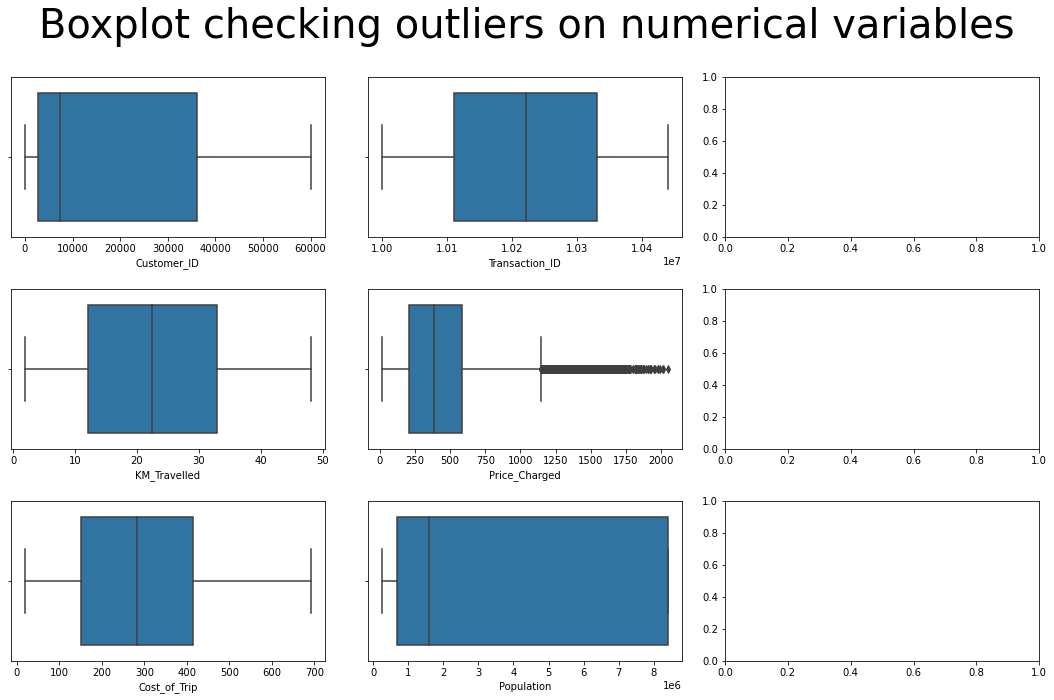

In [34]:
# selecting numerical columns
all_col = cab_Data.select_dtypes(include=np.number).columns.tolist()

fig, axes = plt.subplots(3, 3,  figsize=(15, 10))
fig.suptitle('Boxplot checking outliers on numerical variables', fontsize=40)
counter = 0
for ii in range(3):
    sns.boxplot(ax=axes[ii][0],x=cab_Data[all_col[counter]])
    counter = counter+1
    if counter != 6:
        sns.boxplot(ax=axes[ii][1],x=cab_Data[all_col[counter]])
        counter = counter+1
    else:
        pass

fig.tight_layout(pad=2.0)

There is significant amout of outliers in price_charged. This maybe due to to high end car usage or special arrangement that may involve waiting for client. This should be investigated further. 

# Exploratory Data Analysis

### Correlation Matrix

<AxesSubplot:>

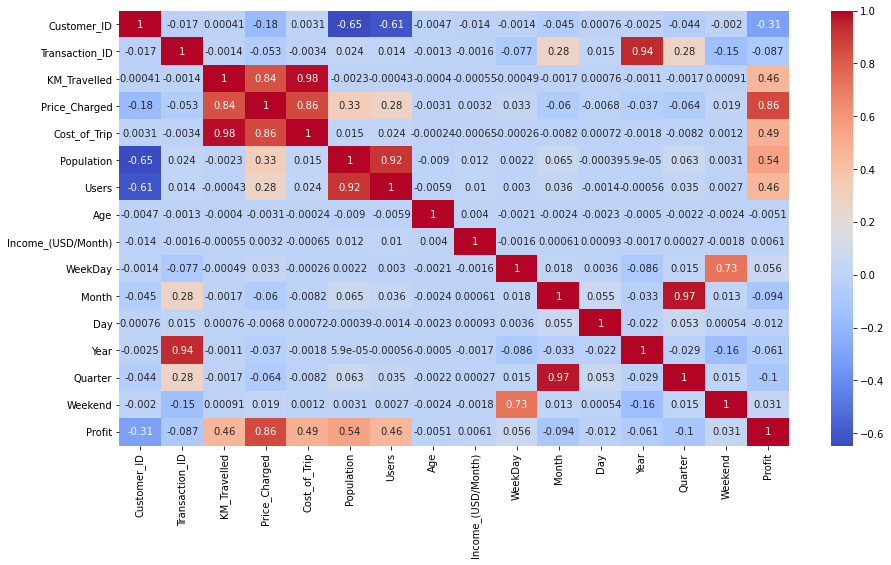

In [35]:
plt.figure(figsize=(15, 8))
sns.heatmap(cab_Data.corr(), annot=True, cmap="coolwarm")

- There's positive correlation between cost of trip and km travelled, price charged and km traveled, price charged and cost of trip, population and users

In [36]:
# Define company colors
company_colors = {'Pink Cab': 'pink', 'Yellow Cab': 'yellow'}

### Gender

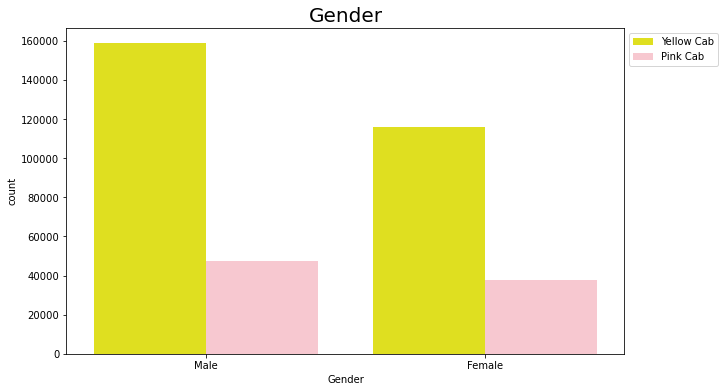

In [37]:
# Plot the gender count with hue based on company
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=cab_Data, 
                   x='Gender', hue='Company', 
                   palette=company_colors, 
                   order=cab_Data['Gender'].value_counts().index)

# Move the legend to the upper left outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.title('Gender', fontsize=20)
plt.show()


- Males are the dorminant users.

### Payment Mode

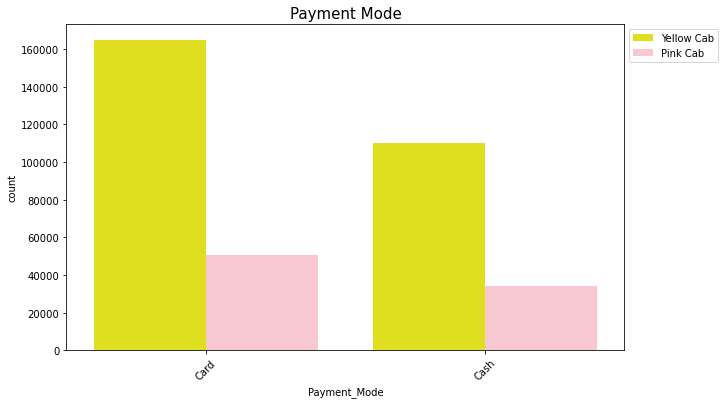

In [38]:
# Plot the count of payment mode with hue based on company
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=cab_Data, 
                   x='Payment_Mode', hue='Company', 
                   palette=company_colors, 
                   order=cab_Data['Payment_Mode'].value_counts().index)

# Move the legend to the upper left outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.title('Payment Mode', fontsize=15)
plt.xticks(rotation=45)
plt.show()


- Card mode of payment is the preferred option

### Number of Rides Per City

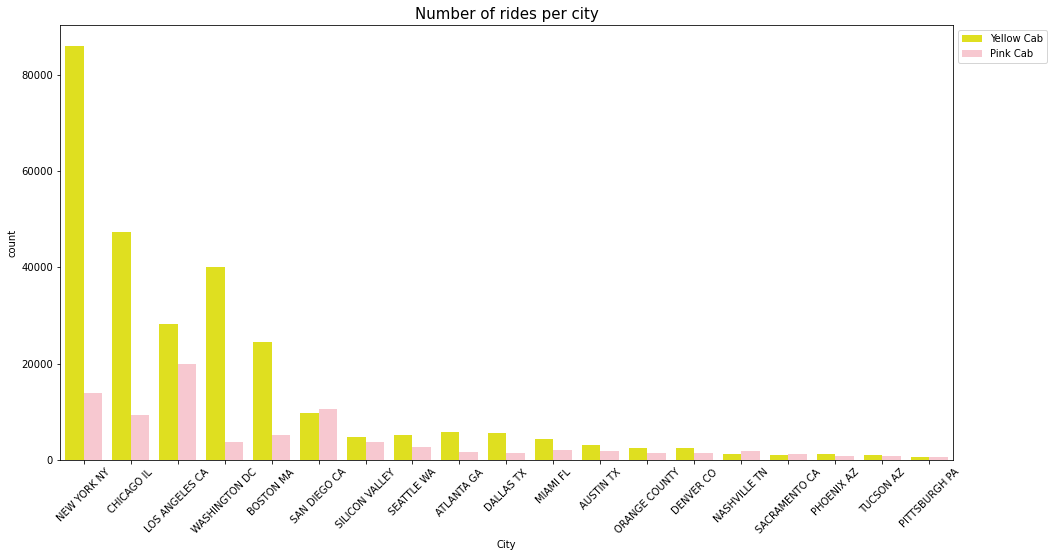

In [39]:
# Plot the count of rides per city with hue based on company
plt.figure(figsize=(16, 8))
ax = sns.countplot(data=cab_Data, 
                   x='City', hue='Company', 
                   palette=company_colors, 
                   order=cab_Data['City'].value_counts().index)

# Add legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.title('Number of rides per city', fontsize=15)
plt.xticks(rotation=45)
plt.show()


- Yellow cab has clear lead i four cities(New York, Chcago, Los Angeles and Boston)
- Other cities showed stiff competition

### Date Analysis

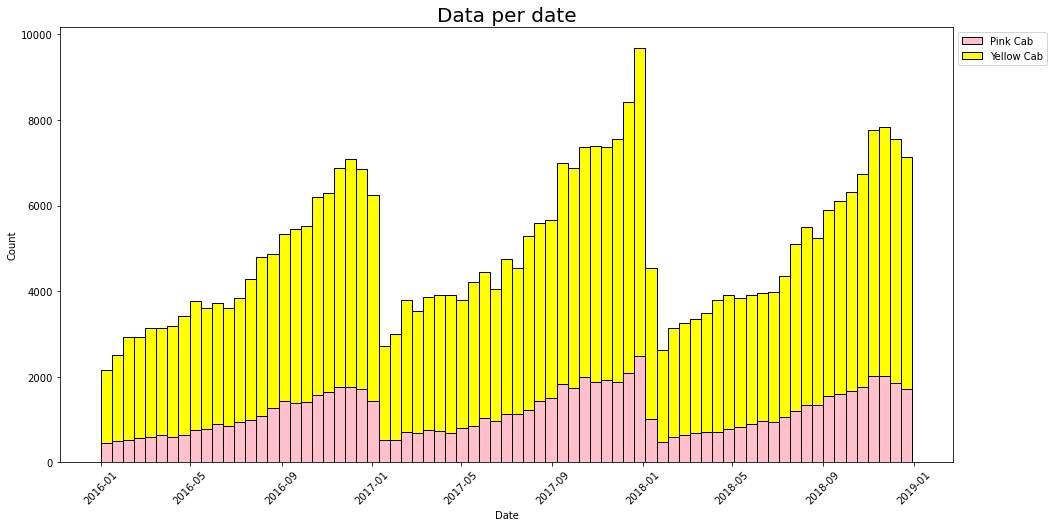

,min,max
Company,,
Pink Cab,2016-01-01,2018-12-30
Yellow Cab,2016-01-01,2018-12-30


In [40]:
# Set the figure size
plt.figure(figsize=(16, 8))

# Your seaborn plot code
ax = sns.histplot(data=cab_Data,
                  x='Date', hue='Company',
                  alpha=1, palette=company_colors, multiple='stack')  # Add multiple='stack' to stack the bars

# Specify the labels for the legend
legend_labels = ['Pink Cab', 'Yellow Cab']

# Move the legend to the upper left outside the plot
ax.legend(labels=legend_labels, loc='upper left', bbox_to_anchor=(1, 1))

plt.title('Data per date', fontsize=20)
plt.xticks(rotation=45)
plt.show()

display(cab_Data.groupby('Company')['Date'].agg(['min', 'max']))


- Data range is from 2016-01-02 to 2018-12-31 for each company
- There are more transaction towards the end of the year.

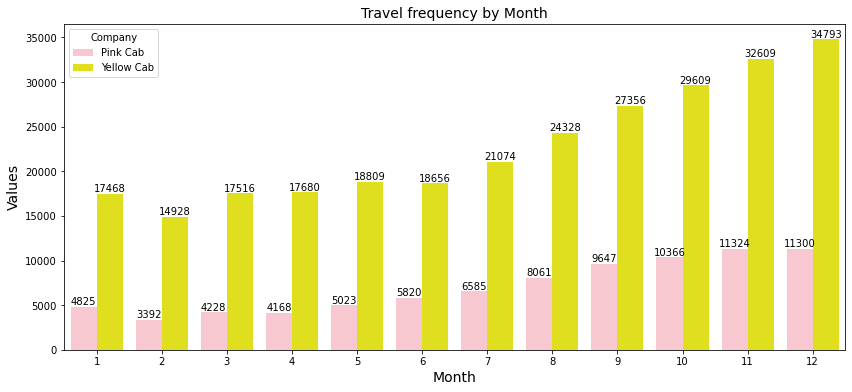

In [41]:
plt.figure(figsize=(14, 6))

# Group data by 'Company' and 'Month' and sum the values
plot_combined = cab_Data.groupby(['Company', 'Month']).size().reset_index(name='Count')

# Plot the combined data with specified colors
ax = sns.barplot(x='Month', y='Count', data=plot_combined, hue='Company', palette=company_colors)

# Add annotations to each bar/column
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                 textcoords='offset points')

plt.title('Travel frequency by Month', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.legend(title='Company')

plt.show()


- The count frquency shows that Yellow cab company is leading.
- There are more transaction towards the end of the year.

### Weekend Effect

In [42]:
rides_per_date = cab_Data.groupby(['Date', 'Company']).agg({'Transaction_ID':'nunique', 'Customer_ID':'nunique', 'Holiday':'max', 'Year':'max'}).reset_index()

rides_per_date = rides_per_date.rename(columns={'Transaction_ID':'Number of Rides', 'Customer_ID':'Number of Users'})

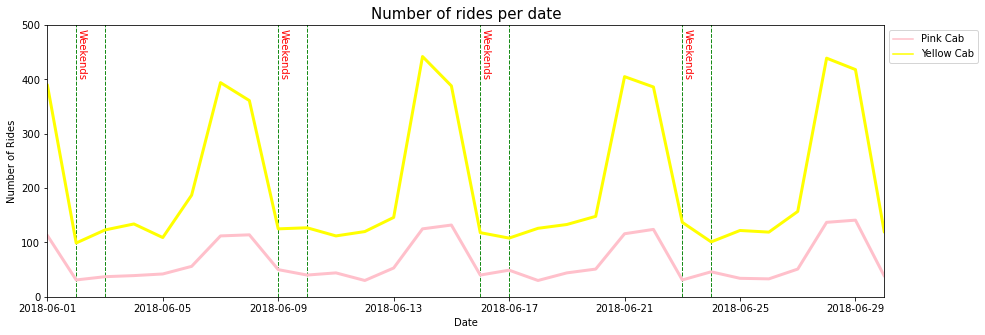

In [57]:
rides_per_date['WeekDay'] = rides_per_date['Date'].dt.dayofweek
rides_per_date['Weekend'] = rides_per_date['WeekDay'].apply(is_weekend)

fig, ax = plt.subplots(1,1, figsize=(15,5))

year = 2018

min_date = datetime.strptime(str(year)+'-06-01', '%Y-%m-%d')
max_date = datetime.strptime(str(year)+'-06-30', '%Y-%m-%d')

g = sns.lineplot(data=rides_per_date,
                 x='Date', y='Number of Rides', hue='Company', 
                 palette=company_colors, linewidth=3, ax=ax)

# Add vertical lines for weekends
ax.vlines(x=rides_per_date['Date'], 
          ymin=0, ymax=rides_per_date['Weekend']*1000, 
          color='green', alpha=0.7, linewidth=1, linestyles='dashed')
    
plt.ylim(0, 500)

# Move the legend to the upper left outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

ax.text(datetime.strptime(str(year)+'-06-02', '%Y-%m-%d'), 400, 'Weekends', 
        color='red', va ='bottom', rotation=-90)
ax.text(datetime.strptime(str(year)+'-06-09', '%Y-%m-%d'), 400, 'Weekends', 
        color='red', va ='bottom', rotation=-90)
ax.text(datetime.strptime(str(year)+'-06-16', '%Y-%m-%d'), 400, 'Weekends', 
        color='red', va ='bottom', rotation=-90)
ax.text(datetime.strptime(str(year)+'-06-23', '%Y-%m-%d'), 400, 'Weekends', 
        color='red', va ='bottom', rotation=-90)

plt.title('Number of rides per date', fontsize=15)

plt.xlim(min_date, max_date)
plt.show()


- There is spike in orders days before the weekends.
- Weekdays remain relatively flat.

Text(0.5, 0, 'Company')

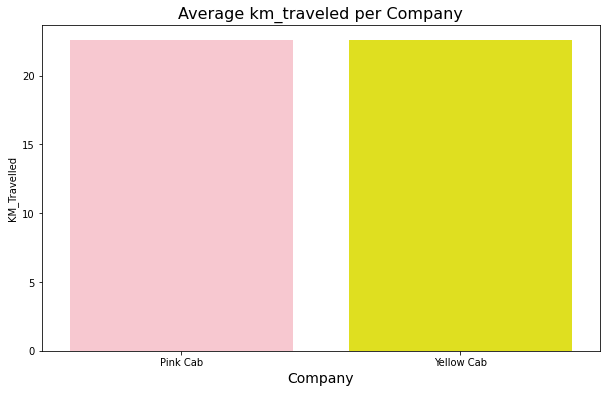

In [44]:
# Calculate average km_traveled per company
avg_km_traveled = cab_Data.groupby('Company')['KM_Travelled'].mean().reset_index()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar plot with specified colors
sns.barplot(x='Company', y='KM_Travelled', data=avg_km_traveled, palette=company_colors)

plt.title('Average km_traveled per Company', fontsize=16)
plt.xlabel('Company', fontsize=14)

- Average KM Travelled is almost equal for both companies

### Price Analysis

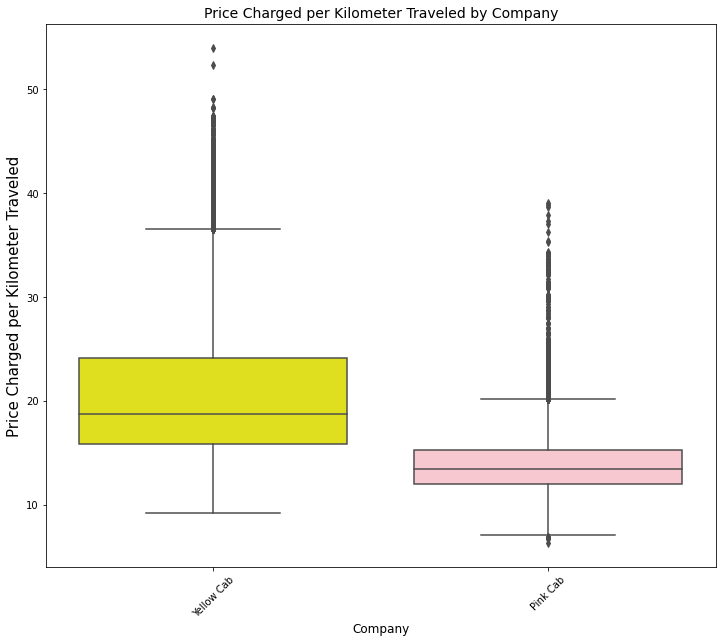

,min,max,mean,std
Company,,,,
Pink Cab,15.6,1623.5,310.8,182.0
Yellow Cab,20.7,2048.0,458.2,288.4


In [45]:
# Calculate the price charged per kilometer traveled for each company
price_per_km = cab_Data['Price_Charged'] / cab_Data['KM_Travelled']

# Create a boxplot
plt.figure(figsize=(12, 10))
boxplot = sns.boxplot(x='Company', y=price_per_km, data=cab_Data, palette=company_colors)

plt.title('Price Charged per Kilometer Traveled by Company', fontsize=14)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Price Charged per Kilometer Traveled', fontsize=15)
plt.xticks(rotation=45)

plt.show()

# Display statistics
display(cab_Data.groupby('Company')['Price_Charged'].agg(['min', 'max', 'mean', 'std']).round(1))


- The average Price Charged for Yellow cab company is 18.75 compared to 13.4 for Pink cab company. Therefore, Yellow cab have charged more in general.

- There are some outliers in high range of values which maybe due to exotic cars hire.
- Table also showed minimum, maximum and mean of Price_charged

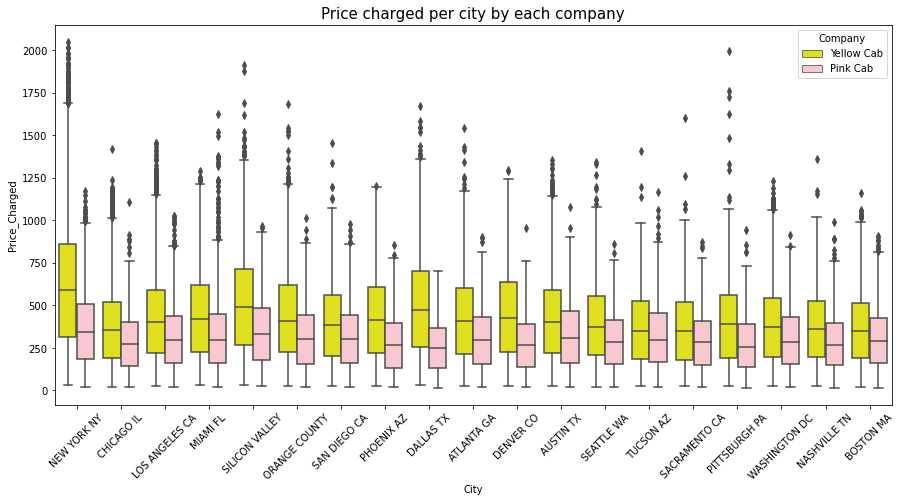

In [46]:
# Plot price charged per city by each company
plt.figure(figsize=(15, 7))
sns.boxplot(x="City", y="Price_Charged", hue="Company", data=cab_Data, palette=company_colors)

# Format y-axis labels
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x)))

plt.title('Price charged per city by each company', fontsize=15)
plt.xticks(rotation=45)
plt.show()


- New York is the city with the highest price

### Cost Per Trip

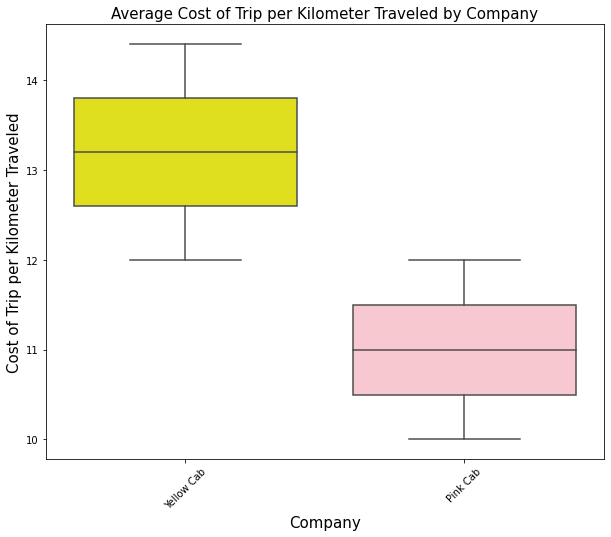

,min,max,mean,std
Company,,,,
Pink Cab,19.0,576.0,248.1,135.4
Yellow Cab,22.8,691.2,297.9,162.5


In [56]:
# Calculate the cost of trip per kilometer traveled for each company
price_per_km = cab_Data['Cost_of_Trip'] / cab_Data['KM_Travelled']

# Create a boxplot
plt.figure(figsize=(10, 8))
boxplot = sns.boxplot(x='Company', y=price_per_km, data=cab_Data, palette=company_colors)

plt.title('Average Cost of Trip per Kilometer Traveled by Company', fontsize=15)
plt.xlabel('Company', fontsize=15)
plt.ylabel('Cost of Trip per Kilometer Traveled', fontsize=15)
plt.xticks(rotation=45)

plt.show()

# Display statistics
display(cab_Data.groupby('Company')['Cost_of_Trip'].agg(['min', 'max', 'mean', 'std']).round(1))


- The average cost of trip for Yellow cab company is 13.20 compared to 11.0 for Pink cab company. Therefore, Yellow cab have more cost over-head. This maybe due to better salary, cars and other factors.
- Table also showed minimum, maximum and mean of cost of trip

### Number of Users

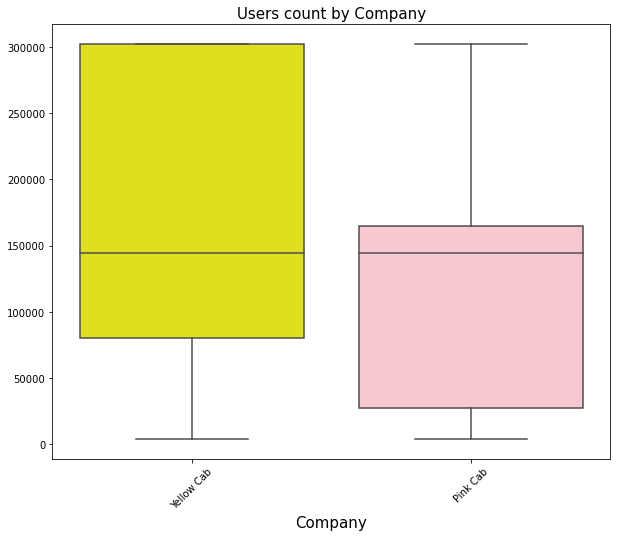

,min,max,mean,std
Company,,,,
Pink Cab,3643,302149,125589.6,94592.3
Yellow Cab,3643,302149,168477.0,100570.6


In [78]:
# Create a boxplot
plt.figure(figsize=(10, 8))
boxplot = sns.boxplot(x='Company', y='Users', data=cab_Data, palette=company_colors)

plt.title('Users count by Company', fontsize=15)
plt.xlabel('Company', fontsize=15)
plt.ylabel('', fontsize=15)
plt.xticks(rotation=45)

plt.show()

# Display statistics
display(cab_Data.groupby('Company')['Users'].agg(['min', 'max', 'mean', 'std']).round(1))


- Yellow cab has a higher number of users

### Users Per City

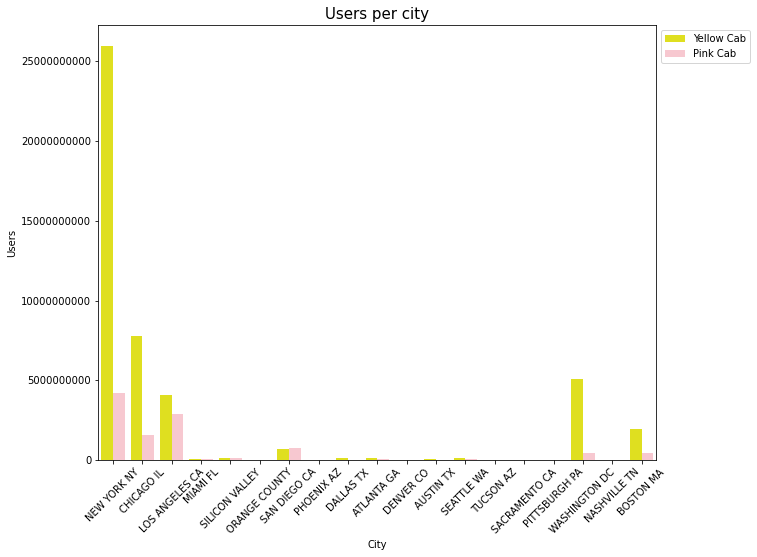

In [76]:
# Plot the bar chart for users per city with hue based on company
plt.figure(figsize=(10, 8))
ax = sns.barplot(data=cab_Data, x='City', y='Users', hue='Company', 
                 estimator=np.sum, palette=company_colors)

# Add legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Format y-axis labels
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x)))

plt.title('Users per city', fontsize=15)
plt.xticks(rotation=45)
plt.show()


- New York city has the highest number of users for both company.

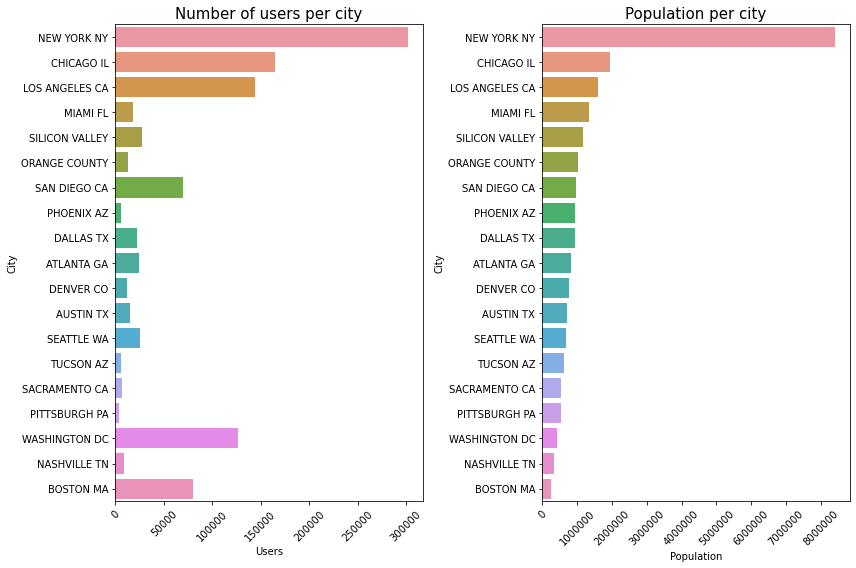

In [68]:
# Create subplots with 1 row and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

# Plot barplot for number of users per city
sns.barplot(data=cab_Data.sort_values(by='Population', ascending=False), 
            x='Users', y='City', ax=ax[0])

# Plot barplot for population per city
sns.barplot(data=cab_Data.sort_values(by='Population', ascending=False), 
            x='Population', y='City', ax=ax[1])

# Rotate x-axis labels for better readability
ax[0].tick_params(axis='x', labelrotation=45)
ax[1].tick_params(axis='x', labelrotation=45)

# Format x-axis labels for the population plot
ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x)))

# Set titles for subplots
ax[0].set_title('Number of users per city', fontsize=15)
ax[1].set_title('Population per city', fontsize=15)

# Adjust layout to prevent overlap of subplots
plt.tight_layout()

# Display the plot
plt.show()


- Number of Users in the city depends on how affordable the cab fare is and not the population. 
- The city of Washington and Boston show that the richness of a city is a major factor that drives cab usage.
- It also shows the huge potential for market expansion.

Note:But this calls for more investigation.

### Profit Analysis

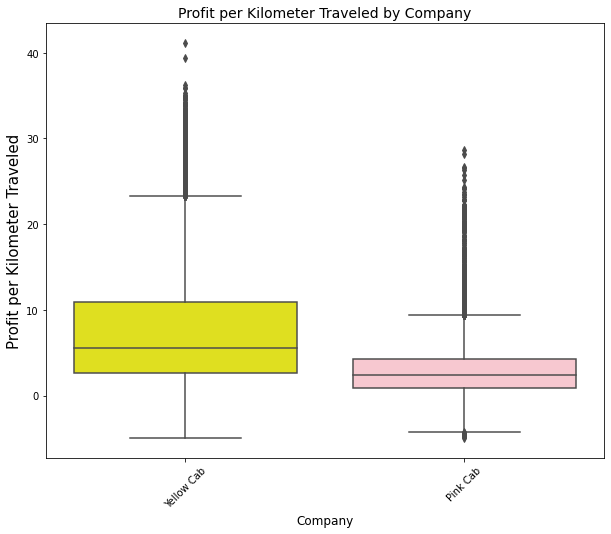

,min,max,mean,std
Company,,,,
Pink Cab,-220.1,1119.5,62.6,77.6
Yellow Cab,-176.9,1464.0,160.3,171.8


In [55]:
# Calculate the profit per kilometer traveled for each company
profit_per_km = cab_Data['Profit'] / cab_Data['KM_Travelled']

# Create a boxplot
plt.figure(figsize=(10, 8))
boxplot = sns.boxplot(x='Company', y=profit_per_km, data=cab_Data, palette=company_colors)

plt.title('Profit per Kilometer Traveled by Company', fontsize=14)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Profit per Kilometer Traveled', fontsize=15)
plt.xticks(rotation=45)

plt.show()

# Display statistics
display(cab_Data.groupby('Company')['Profit'].agg(['min', 'max', 'mean', 'std']).round(1))


- The average Profit per KM for Yellow cab company is 5.6 compared to 2.42 for Pink cab company. Therefore, Yellow cab have more profit compared to Pink cab.
- There are some outliers in high range of values which maybe due to exotic cars hire.
- Some trips made losses for both companies
- Table also showed minimum, maximum and mean of Profit

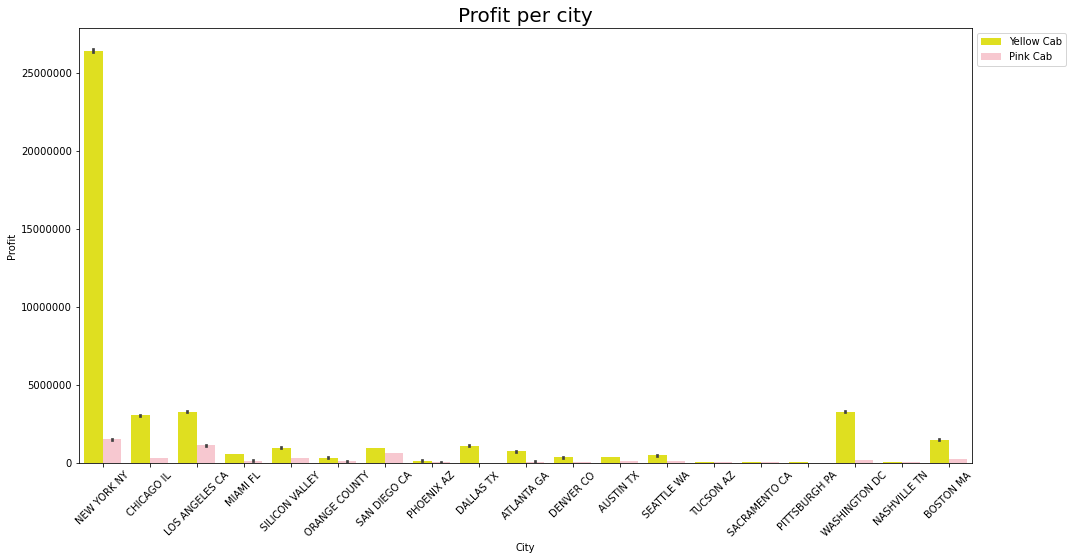

In [51]:
# Plot the bar chart for profit per city with hue based on company
plt.figure(figsize=(16, 8))
ax = sns.barplot(data=cab_Data, x='City', y='Profit', hue='Company', 
                 estimator=np.sum, palette=company_colors)

# Add legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Format y-axis labels
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x)))

plt.title('Profit per city', fontsize=20)
plt.xticks(rotation=45)
plt.show()


- New York is the cash cow city for profit.

### Business Growth

#### Growth in Number of Users

In [52]:
users_per_year = cab_Data.groupby(['Company', 'Year']).agg({'Customer_ID':'nunique'}).reset_index()

users_per_year['Shift'] = users_per_year['Customer_ID'].shift(1, axis=0)

users_per_year['Percent Change'] = (users_per_year['Customer_ID'] - users_per_year['Shift'])/users_per_year['Customer_ID']*100
users_per_year = users_per_year.rename(columns={'Customer_ID':'Amount of users'})

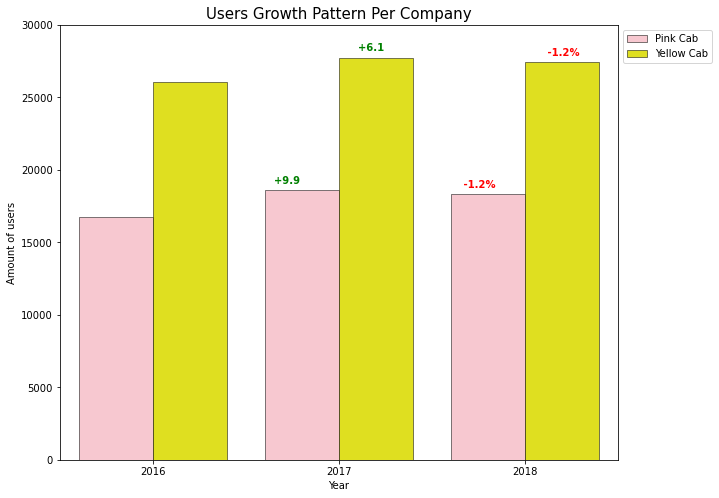

In [53]:
# Create a bar plot for the amount of users per year
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Plot the bar plot
ax = sns.barplot(data=users_per_year, 
                 x='Year', y='Amount of users', hue='Company', 
                 palette=company_colors, linewidth=0.5, edgecolor="black")

# Add percentage change annotations
for i, (amount, percent) in enumerate(users_per_year[['Amount of users', "Percent Change"]].values):        
    if i != 0 and i != 3:
        if i > 3:
            i = i - 3 + 0.45
        if percent > 0:
            t = '+{:.1f}'.format(percent)
            c = 'green'
        else:
            t = ' {:.1f}%'.format(percent)
            c = 'red'
        ax.text(i - 0.35, amount + 300, t, color=c, va='bottom', weight='bold')

# Move the legend to the upper left outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.ylim(0, 30000)
plt.title('Users Growth Pattern Per Company', fontsize=15)

plt.show()


- There is YOY grwoth for both companies in 2016/2017 and a same 1.2 percent decline in 2017/2018.
- Pink cab seems to be doing better in terms of attracting new customers.

### Growth in Profit

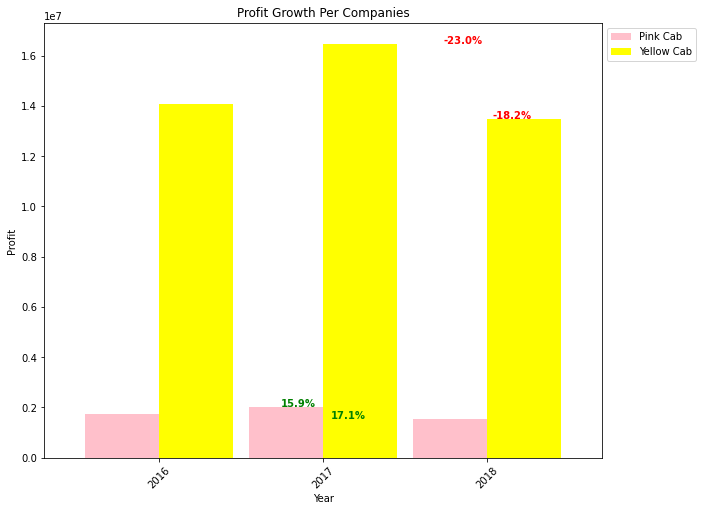

In [54]:
# Filter data for the years 2016, 2017, and 2018 and for Pink and Yellow companies
filtered_df = cab_Data[(cab_Data['Year'].isin([2016, 2017, 2018])) & (cab_Data['Company'].isin(['Pink Cab', 'Yellow Cab']))]

# Group by year and company, and calculate total profit
profit_by_year_company = filtered_df.groupby(['Year', 'Company'])['Profit'].sum().unstack().fillna(0)

# Calculate percentage growth/decline compared to the base year (2016)
percentage_change = profit_by_year_company.pct_change(axis=0) * 100
percentage_change.loc[2016] = None  # Set percentage change for 2016 to None

# Plot the bar chart
ax = profit_by_year_company.plot(kind='bar', figsize=(10, 8), linewidth=0.5, color=company_colors, width=0.9)
plt.title('Profit Growth Per Companies')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.xticks(rotation=45)


# Move the legend to the upper left outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Add percentage growth/decline annotations for 2017 and 2018
for i, (year, percentage) in enumerate(percentage_change.loc[[2017, 2018]].iterrows()):
    for j, value in enumerate(percentage):
        if value is not None:
            color = 'green' if value > 0 else 'red'
            plt.text(i + j * 0.3 + 0.85, profit_by_year_company.iloc[j+1, i] + 100,
                     f'{value:.1f}%', ha='center', color=color, fontweight='bold')

plt.show()


- There is YOY grwoth for both companies in 2016/2017 and a decline in 2017/2018 respectively.


### Conclusion
After a thorough analysis of the dataset, we came out with the following insights:

1. There are more Males than Females for both companies.
2. Yellow cab company has more profit than Pink company.
3. New York is the cash cow city for both companies and Yellow company dominates it.
4. Yellow company have higher percentage of users in most cities.
5. There is spike in number of orders in couple of days before the weekends and towards the end of the year.
6. There is also spike in number of order during holidays.

### Recomendation

Based on the insights above, Yellow cab is better company for investment.